In [1]:
import numpy as np
import gym
import random
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

In [2]:
font = {
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
SEED = 10
np.random.seed(SEED)
random.seed(SEED)

env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
env.action_space.seed(SEED)
env.reset(seed=SEED)

(0, {'prob': 1})

In [4]:
alpha = 0.1  # Współczynnik uczenia
gamma = 0.8  # Współczynnik dyskontowania
epsilon = 0.9  # Parametr eksploracji
num_episodes = 10000  # Liczba epizodów
max_steps = 100  # Maksymalna liczba kroków w epizodzie

Q = np.zeros((env.observation_space.n, env.action_space.n))

In [5]:
def choose_action_boltzmann(state, Q, T, action_space):
    q_t = Q[state, :] / T
    exp_q = np.exp(q_t - np.max(q_t))
    probs = exp_q / np.sum(exp_q)
    return np.random.choice(np.arange(len(Q[state, :])), p=probs)

In [6]:
def choose_action(state, Q, epsilon, action_space):
    if random.uniform(0, 1) < epsilon:
        return action_space.sample()  # Eksploracja
    else:
        return np.argmax(Q[state, :])  # Eksploatacja
        
        if np.max(Q[state]) > 0:
          return np.argmax(Q[state, :])  # Eksploatacja
        else:
          return action_space.sample()

In [252]:
rewards = []

def training():
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_rewards = 0

        for step in range(max_steps):
            action = choose_action(state, Q, epsilon, env.action_space)
            next_state, reward, done, _, _ = env.step(action)
            
            # Aktualizacja Q-funkcji
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            
            state = next_state
            total_rewards += reward
            
            if done:
                break

        rewards.append(total_rewards)

print("Tablica Q przed treningiem")
print(Q)
training()
print("Tablica Q po treningu")
print(Q)
print(rewards)

Tablica Q przed treningiem
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Tablica Q po

In [253]:
def evaluate(episodes):
    nb_success = 0
    rewards = np.zeros(episodes)

    for step in range(episodes):
        state, _ = env.reset()
        done = False
        
        while not done:
            action = np.argmax(Q[state, :])
            new_state, reward, done, info, _ = env.step(action)

            state = new_state
            nb_success += reward

            if done:
                rewards[step] = reward

    print (f"Success rate = {nb_success/episodes*100}%")

evaluate(1000)

Success rate = 24.7%


In [15]:
def train_q_learning(alpha, gamma, initial_epsilon, initial_T=None, boltzmann=False, seed=42, num_episodes=15000, max_steps=6400):
    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
    next_state, _ = env.reset(seed = seed, options={})
    #np.random.seed(seed)
    #random.seed(seed)
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    rewards = np.zeros(num_episodes)
    successes = 0
    min_epsilon = 0.01
    epsilon_decay = 0.995
    epsilon = initial_epsilon

    min_T = 0.001
    T_decay = 0.9995
    T = initial_T

    with tqdm(total=num_episodes, desc=f"Training with alpha={alpha:.3f}, gamma={gamma:.3f}, T={initial_T:.3f}, seed={seed}", unit="episode", leave=False) as episode_bar:
        for episode in range(num_episodes):
            state, _ = env.reset()
            done = False
            truncated = False
            step = 0

            while not done and not truncated and step < max_steps:
                if boltzmann:
                    action = choose_action_boltzmann(state, Q, T, env.action_space)
                else:
                    action = choose_action(state, Q, epsilon, env.action_space)
                
                next_state, reward, done, truncated, _ = env.step(action)
                
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
                
                if reward > 0:
                    rewards[episode] = 1
                    successes += 1

                step += 1
                state = next_state
            if T is not None:
                T = max(min_T, T * T_decay)

            if epsilon is not None:
                epsilon = max(min_epsilon, epsilon * epsilon_decay)
            episode_bar.update(1)
    return (alpha, gamma, initial_epsilon, initial_T), list(rewards), successes

In [16]:
alphas = [0.06]#np.linspace(0.01, 0.1, 7)
gammas = [0.9]#np.linspace(0.7, 0.99, 7)
epsilons = [0.95] #np.linspace(0.1, 0.9, 3)
temperatures = np.linspace(0.1, 0.9, 9)
seeds = [19, 42, 123, 456, 789]

results = {}

# Multithreading with progress bar
total_jobs = len(alphas) * len(gammas) * len(temperatures) * len(seeds)
with ThreadPoolExecutor() as executor:
    futures = []
    with tqdm(total=total_jobs, desc="Training Q-Learning", unit="job") as pbar:
        for alpha in alphas:
            for gamma in gammas:
                for T in temperatures:
                    for seed in seeds:
                        futures.append(executor.submit(train_q_learning, alpha, gamma, None, T, True, seed=seed))
        
        for future in as_completed(futures):
            key, rewards, successes = future.result()
            if key not in results:
                results[key] = []
            results[key].append((rewards, successes))
            pbar.update(1)

Training Q-Learning:   0%|          | 0/45 [00:00<?, ?job/s]

Training with alpha=0.060, gamma=0.900, T=0.100, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.100, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.100, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.100, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.100, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.200, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.200, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.200, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.200, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.200, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.300, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.300, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.300, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.300, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.300, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.400, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.400, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.400, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.400, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.400, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.500, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.500, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.500, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.500, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.500, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.600, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.600, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.600, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.600, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.600, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.700, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.700, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.700, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.700, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.700, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.800, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.800, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.800, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.800, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.800, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.900, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.900, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.900, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.900, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, T=0.900, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

In [90]:
alphas = [0.06]#np.linspace(0.01, 0.1, 7)
gammas = [0.9]#np.linspace(0.7, 0.99, 7)
epsilons = np.linspace(0.2, 1, 7)
temperatures = [0.5]
seeds = [19, 42, 123, 456, 789]

results = {}

# Multithreading with progress bar
total_jobs = len(alphas) * len(gammas) * len(epsilons) * len(seeds)
with ThreadPoolExecutor() as executor:
    futures = []
    with tqdm(total=total_jobs, desc="Training Q-Learning", unit="job") as pbar:
        for alpha in alphas:
            for gamma in gammas:
                for epsilon in epsilons:
                    for seed in seeds:
                        futures.append(executor.submit(train_q_learning, alpha, gamma, epsilon, None, False, seed=seed))
        
        for future in as_completed(futures):
            key, rewards, successes = future.result()
            if key not in results:
                results[key] = []
            results[key].append((rewards, successes))
            pbar.update(1)

Training Q-Learning:   0%|          | 0/35 [00:00<?, ?job/s]

Training with alpha=0.060, gamma=0.900, esp=0.200, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.200, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.200, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.333, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.333, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.200, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.200, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.333, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.467, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.333, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.333, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.467, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.467, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.467, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.467, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.600, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.600, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.600, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.600, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.600, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.733, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.733, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.733, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.733, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.733, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.867, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.867, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.867, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.867, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=0.867, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=1.000, seed=19:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=1.000, seed=42:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=1.000, seed=123:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=1.000, seed=456:   0%|          | 0/15000 [00:00<?, ?episode/s]

Training with alpha=0.060, gamma=0.900, esp=1.000, seed=789:   0%|          | 0/15000 [00:00<?, ?episode/s]

In [17]:
def aggregate_results(results, param_idx):
    aggregated_results = {}
    for key, result_list in results.items():
        param_value = key[param_idx]
        if param_value not in aggregated_results:
            aggregated_results[param_value] = []
        aggregated_results[param_value].extend(result_list)
    return aggregated_results

In [24]:
# Plotting average rewards for each parameter
def plot_aggregated_results(aggregated_results, param_name, window_size=1000):
    plt.figure(figsize=(10, 6))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(aggregated_results)))
    for (param_value, result_list), color in zip(sorted(aggregated_results.items()), colors):
        result_list.reverse()
        all_rewards = np.array([rewards for rewards, _ in result_list])
        avg_rewards = np.mean(all_rewards, axis=0)
        sliding_avg_rewards = np.convolve(avg_rewards, np.ones(window_size)/window_size, mode='valid')
        episodes = np.arange(len(sliding_avg_rewards)) + window_size//2
        std_rewards = np.std(all_rewards, axis=0)
        #episodes = np.arange(len(avg_rewards))
        plt.plot(episodes, sliding_avg_rewards, label=f"{param_name}={param_value:.3f}", color=color)
        #plt.fill_between(episodes, avg_rewards - std_rewards, avg_rewards + std_rewards, alpha=0.3)
    plt.xlabel("Epizod")
    plt.ylabel("Nagroda")
    plt.legend()
    plt.title(f"Wpływ parametru {param_name} na zbieżność algorytmu")
    plt.show()

In [88]:
aggregated_epsilon = aggregate_results(results, 2)
print(results.keys())

dict_keys([(0.06, 0.9, 0.1, None), (0.06, 0.9, 0.23333333333333334, None), (0.06, 0.9, 0.3666666666666667, None), (0.06, 0.9, 0.5, None), (0.06, 0.9, 0.6333333333333333, None), (0.06, 0.9, 0.7666666666666666, None), (0.06, 0.9, 0.9, None)])


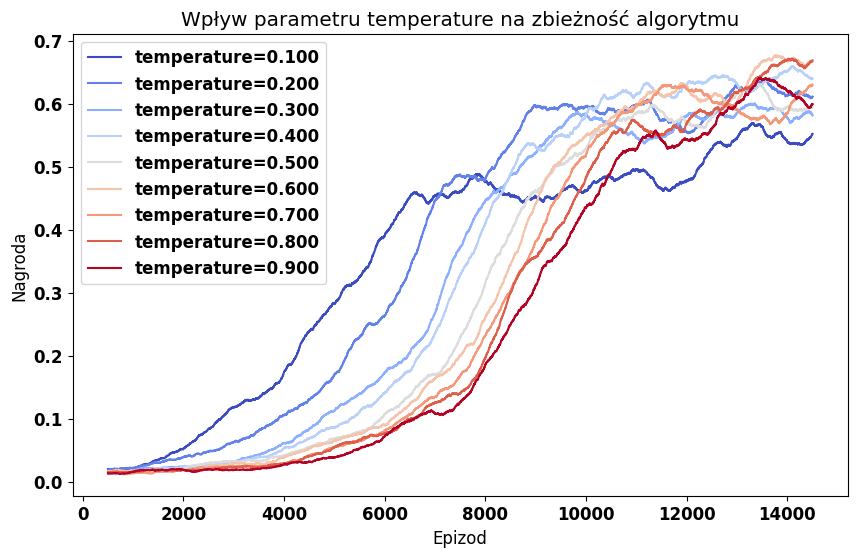

In [25]:
# Aggregating and plotting results for alpha
#aggregated_alpha = aggregate_results(results, 0)
#plot_aggregated_results(aggregated_alpha, "alpha")

# Aggregating and plotting results for gamma
#aggregated_gamma = aggregate_results(results, 1)
#plot_aggregated_results(aggregated_gamma, "gamma")

# Aggregating and plotting results for epsilon
#aggregated_epsilon = aggregate_results(results, 2)
#plot_aggregated_results(aggregated_epsilon, "epsilon")

# Aggregating and plotting results for temperature (Boltzmann)
aggregated_temperature = aggregate_results(results, 3)
plot_aggregated_results(aggregated_temperature, "temperature")

In [105]:
def print_latex_table(summary, param_name):
    print(f"\\begin{{table}}[h!]")
    print(f"\\centering")
    print(f"\\begin{{tabular}}{{|c|c|c|}}")
    print(f"\\hline")
    print(f"{param_name} & Średnia nagroda & Średnia liczba sukcesów \\\\ \\hline")
    for param, (avg_reward, std_reward, avg_successes) in summary.items():
        print(f"{param:.3f} & {avg_reward:.2f} $\pm$ {std_reward:.2f} & {avg_successes:.2f} \\\\ \\hline")
    print(f"\\end{{tabular}}")
    print(f"\\caption{{Wpływ {param_name} na zbieżność algorytmu}}")
    print(f"\\end{{table}}")

# Summary for alpha
summary_alpha = summarize_results(aggregated_alpha)
print("Alpha Results:")
print_latex_table(summary_alpha, "Współczynnik uczenia (α)")

# Summary for gamma
summary_gamma = summarize_results(aggregated_gamma)
print("\nGamma Results:")
print_latex_table(summary_gamma, "Współczynnik dyskontowania (γ)")

# Summary for epsilon
summary_epsilon = summarize_results(aggregated_epsilon)
print("\nEpsilon Results:")
print_latex_table(summary_epsilon, "Parametr eksploracji (ε)")

# Summary for temperature (Boltzmann)
summary_temperature = summarize_results(aggregated_temperature)
print("\nTemperature Results:")
print_latex_table(summary_temperature, "Parametr temperatury (T)")

Alpha Results:
\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|}
\hline
Współczynnik uczenia (α) & Średnia nagroda & Średnia liczba sukcesów \\ \hline
0.060 & 0.19 $\pm$ 0.26 & 2602.20 \\ \hline
\end{tabular}
\caption{Wpływ Współczynnik uczenia (α) na zbieżność algorytmu}
\end{table}

Gamma Results:
\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|}
\hline
Współczynnik dyskontowania (γ) & Średnia nagroda & Średnia liczba sukcesów \\ \hline
0.900 & 0.19 $\pm$ 0.26 & 2602.20 \\ \hline
\end{tabular}
\caption{Wpływ Współczynnik dyskontowania (γ) na zbieżność algorytmu}
\end{table}

Epsilon Results:
\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|}
\hline
Parametr eksploracji (ε) & Średnia nagroda & Średnia liczba sukcesów \\ \hline
0.467 & 0.00 $\pm$ 0.00 & 0.40 \\ \hline
0.200 & 0.00 $\pm$ 0.00 & 0.20 \\ \hline
0.333 & 0.06 $\pm$ 0.12 & 1282.40 \\ \hline
0.600 & 0.36 $\pm$ 0.31 & 2652.40 \\ \hline
0.733 & 0.08 $\pm$ 0.16 & 1214.80 \\ \hline
0.867 & 0.42 $\pm$ 0.19 & 7823.40 \\ 

In [104]:
def summarize_results(results):
    summary = {}
    for param, result_list in results.items():
        final_rewards = [rewards[-10:] for rewards, _ in result_list]
        avg_final_reward = np.mean([np.mean(reward) for reward in final_rewards])
        std_final_reward = np.std([np.mean(reward) for reward in final_rewards])
        avg_successes = np.mean([successes for _, successes in result_list])
        summary[param] = (avg_final_reward, std_final_reward, avg_successes)
    return summary

# Summary for alpha
summary_alpha = summarize_results(aggregated_alpha)
print("Alpha Results:")
for alpha, (avg_reward, std_reward, successes) in summary_alpha.items():
    print(f"alpha={alpha}: Avg Reward={avg_reward:.2f}, Std Reward={std_reward:.2f}, Avg Successes={successes:.2f}")

# Summary for gamma
summary_gamma = summarize_results(aggregated_gamma)
print("\nGamma Results:")
for gamma, (avg_reward, std_reward, successes) in summary_gamma.items():
    print(f"gamma={gamma}: Avg Reward={avg_reward:.2f}, Std Reward={std_reward:.2f}, Avg Successes={successes:.2f}")

# Summary for epsilon
summary_epsilon = summarize_results(aggregated_epsilon)
print("\nEpsilon Results:")
for epsilon, (avg_reward, std_reward, successes) in summary_epsilon.items():
    print(f"epsilon={epsilon}: Avg Reward={avg_reward:.2f}, Std Reward={std_reward:.2f}, Avg Successes={successes:.2f}")

Alpha Results:
alpha=0.06: Avg Reward=0.19, Std Reward=0.26, Avg Successes=2602.20

Gamma Results:
gamma=0.9: Avg Reward=0.19, Std Reward=0.26, Avg Successes=2602.20

Epsilon Results:
epsilon=0.4666666666666667: Avg Reward=0.00, Std Reward=0.00, Avg Successes=0.40
epsilon=0.2: Avg Reward=0.00, Std Reward=0.00, Avg Successes=0.20
epsilon=0.33333333333333337: Avg Reward=0.06, Std Reward=0.12, Avg Successes=1282.40
epsilon=0.6000000000000001: Avg Reward=0.36, Std Reward=0.31, Avg Successes=2652.40
epsilon=0.7333333333333334: Avg Reward=0.08, Std Reward=0.16, Avg Successes=1214.80
epsilon=0.8666666666666667: Avg Reward=0.42, Std Reward=0.19, Avg Successes=7823.40
epsilon=1.0: Avg Reward=0.42, Std Reward=0.22, Avg Successes=5241.80
